В данном практическом задании предлагается решить задачу бинарной классификации с помощью 2-х методов:


*   логистической регрессии;
*   метода k ближайших соседей.

В ходе решения разделите выборку на обучающую и проверочную.

Постройте распределение выборки по классам в виде графиков.

Для каждого классификатора расчитайте:
* долю верных ответов
* матрицу ошибок
* точность, полноту и F-меру

Постройте следующие графики:
* PR кривые для 2-х алгоритмов на одном графике;
* ROC кривые для 2-х алгоритмов на одном графике.

В легенде графиков отразите:
* Average Precision для PR кривой
* ROC-AUC для ROC кривой.

В конце сделайте выводы об предлагаемом алгоритме и порогах его работы.


Ниже сгенерирован набор данных для задачи бинарной классификации

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [37]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples = 1000,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_repeated = 0,
    n_classes = 2,
    n_clusters_per_class = 1,
    weights = (0.15, 0.85),
    class_sep = 6.0,
    hypercube = False,
    random_state = 2,
)

In [38]:
X

array([[ 1.78642154, -0.08708982],
       [ 1.93935655,  1.53715877],
       [ 0.81080629, -0.9968092 ],
       ...,
       [ 3.48114095, -0.65262286],
       [ 1.64616115,  0.31820271],
       [ 0.91429268,  1.28637434]])

In [39]:
y

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [40]:
y = pd.DataFrame(y)

In [65]:
df = pd.DataFrame(X, columns = ['x1', 'x2'])

In [66]:
df['Y'] = y

In [67]:
df

,x1,x2,Y
0,1.786422,-0.087090,1
1,1.939357,1.537159,1
2,0.810806,-0.996809,0
3,0.189179,0.474802,1
4,3.299366,-0.193288,0
...,...,...,...
995,0.201365,0.487992,1
996,0.699713,0.557117,1
997,3.481141,-0.652623,1
998,1.646161,0.318203,1


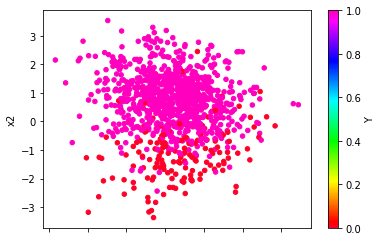

In [68]:
df.plot.scatter(x = 'x1', y= 'x2', c='Y', colormap='gist_rainbow');

Заметно явное преобладание второго класса

In [49]:
RANDOM_SEED = 24

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=RANDOM_SEED,
)

# Логистическая регрессия

In [51]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression(random_state=RANDOM_SEED).fit(X_train, y_train)

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Модель ближайших соседей 

In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


# Метрики качества

In [53]:
from sklearn.metrics import accuracy_score

logreg_y_pred = logreg_clf.predict(X_test)
logreg_acc = accuracy_score(y_test, logreg_y_pred)

knn_y_pred = knn_clf.predict(X_test)
knn_acc = accuracy_score(y_test, knn_y_pred)

print("LogReg accuracy = {:.4f}".format(logreg_acc))
print("kNN accuracy = {:.4f}".format(knn_acc))

LogReg accuracy = 0.9200
kNN accuracy = 0.9000


# Построим матрицу ошибок

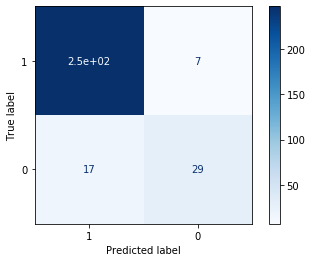

In [54]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg_clf, X_test, y_test, cmap=plt.cm.Blues, labels=[1, 0]);

# Точность и полнота

In [55]:
from sklearn.metrics import precision_score, recall_score

logreg_precision = precision_score(y_test, logreg_y_pred)
logreg_recall = recall_score(y_test, logreg_y_pred)

knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)

print("LogReg precision = {:.4f}".format(logreg_precision))
print("LogReg recall = {:.4f}".format(logreg_recall))
print("")
print("kNN precision = {:.4f}".format(knn_precision))
print("kNN recall = {:.4f}".format(knn_recall))

LogReg precision = 0.9356
LogReg recall = 0.9724

kNN precision = 0.9375
kNN recall = 0.9449


# F - мера

In [56]:
from sklearn.metrics import f1_score

logreg_f1 = f1_score(y_test, logreg_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)

print("LogReg F1 = {:.4f}".format(logreg_f1))
print("kNN F1 = {:.4f}".format(knn_f1))

LogReg F1 = 0.9537
kNN F1 = 0.9412


# PR кривая

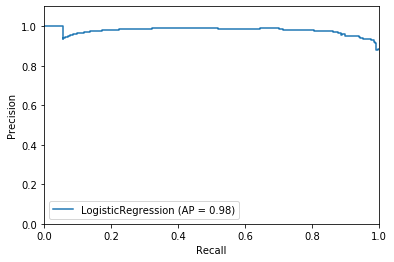

In [57]:
from sklearn.metrics import plot_precision_recall_curve

logreg_y_proba = logreg_clf.predict_proba(X_test)[:, 1]

disp = plot_precision_recall_curve(logreg_clf, X_test, y_test)
disp.ax_.set_ylim((0, 1.1))
disp.ax_.set_xlim((0, 1));


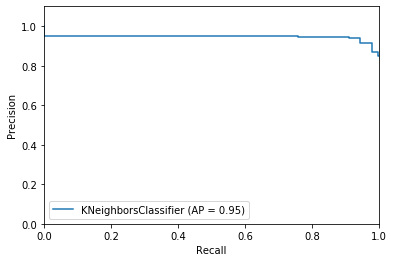

In [64]:
disp = plot_precision_recall_curve(knn_clf, X_test, y_test)
disp.ax_.set_ylim((0, 1.1))
disp.ax_.set_xlim((0, 1));

# ROC кривая

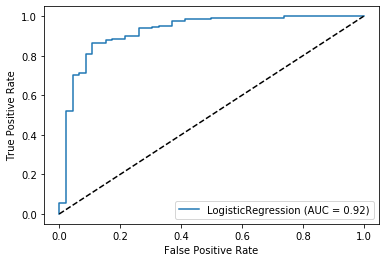

In [59]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(logreg_clf, X_test, y_test)
disp.ax_.plot([0, 1], [0, 1], 'k--');

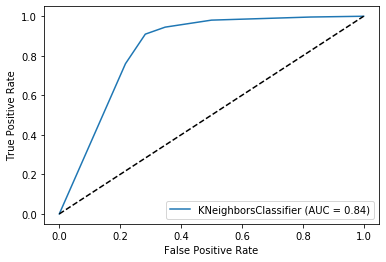

In [61]:
disp = plot_roc_curve(knn_clf, X_test, y_test)
disp.ax_.plot([0, 1], [0, 1], 'k--');

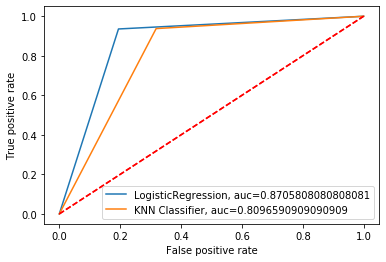

In [81]:
from sklearn import metrics
fpr, tpr, thresh = metrics.roc_curve(logreg_y_pred, y_test)
auc = metrics.roc_auc_score(logreg_y_pred, y_test)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(knn_y_pred, y_test)
auc = metrics.roc_auc_score(knn_y_pred, y_test)
plt.plot(fpr,tpr,label="KNN Classifier, auc="+str(auc))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot([[0,0], [1,1]], color = 'red', linestyle = '--')
plt.legend(loc=0)

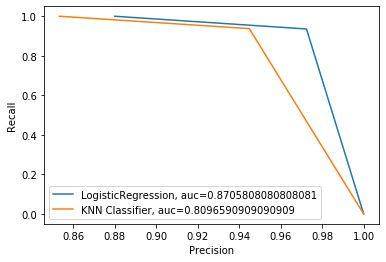

In [77]:
#p, r = metrics.precision_recall_curve()
fpr, tpr, thresh = metrics.precision_recall_curve(logreg_y_pred, y_test)
auc = metrics.roc_auc_score(logreg_y_pred, y_test)
plt.plot(fpr,tpr,label="LogisticRegression, auc="+str(auc))

fpr, tpr, thresh = metrics.precision_recall_curve(knn_y_pred, y_test)
auc = metrics.roc_auc_score(knn_y_pred, y_test)
plt.plot(fpr,tpr,label="KNN Classifier, auc="+str(auc))
plt.xlabel("Precision")
plt.ylabel("Recall")

plt.legend(loc=0)